# Machine Learning-Based Predictive Models for Healthcare Resource Allocation

## Data Understanding

healthcare management has various use cases for using data science, patient length of stay is one critical parameter to 
observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

## Dataset Variable Explanation

## 1. Importing libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 2.Data Collection and Cleaning

In [4]:
# Replace 'path_to_file' with the actual path to your CSV file.
df=pd.read_csv(r"C:\Users\Ondezx\Downloads\source code\dataset\train.csv")
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [3]:
df.head() 

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
# Number of rows and columns in the datset
df.shape

(318438, 18)

In [5]:
# Geting details about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
#checking for missing value
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [7]:
df['Bed Grade'] = df['Bed Grade'].fillna(method="ffill",axis=0)
df['City_Code_Patient'] = df['City_Code_Patient'].fillna(method="ffill",axis=0) 

In [8]:
#checking for missing value
df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [9]:
# checking the absence and presence of heart disease
# target feature (0 : no disease, 1 : disease)
df['Age'].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [10]:
# checking the absence and presence of heart disease
# target feature (0 : no disease, 1 : disease)
df['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

## Data Preprocessing

#### Encode categorical variables

In [11]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [12]:
from gensim.models import Word2Vec
import pandas as pd

categorical_columns =['Type of Admission', 'Severity of Illness','Department']
# Combine categorical columns for training Word2Vec embeddings
sentences = df.apply(lambda row: [row['Department'], row['Severity of Illness'], row['Type of Admission']], axis=1).tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=10, window=3, min_count=1, workers=4)

# Encode categorical columns using Word2Vec embeddings
df['Department'] = df['Department'].apply(lambda x: word2vec_model.wv[x].tolist())
df['Severity of Illness'] = df['Severity of Illness'].apply(lambda x: word2vec_model.wv[x].tolist())
df['Type of Admission'] = df['Type of Admission'].apply(lambda x: word2vec_model.wv[x].tolist())

# Display the resulting DataFrame
print(df[['Department', 'Severity of Illness', 'Type of Admission']])
selected_columns = ['Department', 'Severity of Illness', 'Type of Admission']
df_1 = df[selected_columns]


                                               Department  \
0       [-0.3434799015522003, 0.30073118209838867, 1.3...   
1       [-0.3434799015522003, 0.30073118209838867, 1.3...   
2       [0.03595907241106033, 0.7044366598129272, 1.10...   
3       [-0.3434799015522003, 0.30073118209838867, 1.3...   
4       [-0.3434799015522003, 0.30073118209838867, 1.3...   
...                                                   ...   
318433  [-0.3434799015522003, 0.30073118209838867, 1.3...   
318434  [0.03595907241106033, 0.7044366598129272, 1.10...   
318435  [-0.38738352060317993, 0.10259786993265152, 1....   
318436  [0.03595907241106033, 0.7044366598129272, 1.10...   
318437  [-0.38738352060317993, 0.10259786993265152, 1....   

                                      Severity of Illness  \
0       [-0.2822989523410797, 0.5281775593757629, -1.6...   
1       [-0.2822989523410797, 0.5281775593757629, -1.6...   
2       [-0.2822989523410797, 0.5281775593757629, -1.6...   
3       [-0.28229895234

In [13]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,"[-0.3434799015522003, 0.30073118209838867, 1.3...",R,F,2.0,31397,7.0,"[0.12672929465770721, -0.09058370441198349, 1....","[-0.2822989523410797, 0.5281775593757629, -1.6...",2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,"[-0.3434799015522003, 0.30073118209838867, 1.3...",S,F,2.0,31397,7.0,"[1.3262807130813599, -0.06912900507450104, 1.4...","[-0.2822989523410797, 0.5281775593757629, -1.6...",2,51-60,5954.0,41-50
2,3,10,e,1,X,2,"[0.03595907241106033, 0.7044366598129272, 1.10...",S,E,2.0,31397,7.0,"[1.3262807130813599, -0.06912900507450104, 1.4...","[-0.2822989523410797, 0.5281775593757629, -1.6...",2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,"[-0.3434799015522003, 0.30073118209838867, 1.3...",R,D,2.0,31397,7.0,"[1.3262807130813599, -0.06912900507450104, 1.4...","[-0.2822989523410797, 0.5281775593757629, -1.6...",2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,"[-0.3434799015522003, 0.30073118209838867, 1.3...",S,D,2.0,31397,7.0,"[1.3262807130813599, -0.06912900507450104, 1.4...","[-0.2822989523410797, 0.5281775593757629, -1.6...",2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,"[-0.3434799015522003, 0.30073118209838867, 1.3...",Q,F,4.0,86499,23.0,"[0.12672929465770721, -0.09058370441198349, 1....","[-0.12079022824764252, 0.591995894908905, -1.7...",3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,"[0.03595907241106033, 0.7044366598129272, 1.10...",Q,E,4.0,325,8.0,"[0.9072882533073425, -0.02068011835217476, 1.3...","[-0.12079022824764252, 0.591995894908905, -1.7...",4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,"[-0.38738352060317993, 0.10259786993265152, 1....",R,F,4.0,125235,10.0,"[0.12672929465770721, -0.09058370441198349, 1....","[-0.2879689633846283, 0.6807402968406677, -1.7...",3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,"[0.03595907241106033, 0.7044366598129272, 1.10...",Q,D,3.0,91081,8.0,"[1.3262807130813599, -0.06912900507450104, 1.4...","[-0.2879689633846283, 0.6807402968406677, -1.7...",5,11-20,3761.0,11-20


In [14]:
# List of categorical columns
categorical_columns = ['Hospital_type_code', 'Hospital_region_code', 'Ward_Type', 'Ward_Facility_Code','Age','Stay']
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    df.fillna(0, inplace=True)

In [15]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,"[-0.3434799015522003, 0.30073118209838867, 1.3...",2,5,2.0,31397,7.0,"[0.12672929465770721, -0.09058370441198349, 1....","[-0.2822989523410797, 0.5281775593757629, -1.6...",2,5,4911.0,0
1,2,2,2,5,2,2,"[-0.3434799015522003, 0.30073118209838867, 1.3...",3,5,2.0,31397,7.0,"[1.3262807130813599, -0.06912900507450104, 1.4...","[-0.2822989523410797, 0.5281775593757629, -1.6...",2,5,5954.0,4
2,3,10,4,1,0,2,"[0.03595907241106033, 0.7044366598129272, 1.10...",3,4,2.0,31397,7.0,"[1.3262807130813599, -0.06912900507450104, 1.4...","[-0.2822989523410797, 0.5281775593757629, -1.6...",2,5,4745.0,3
3,4,26,1,2,1,2,"[-0.3434799015522003, 0.30073118209838867, 1.3...",2,3,2.0,31397,7.0,"[1.3262807130813599, -0.06912900507450104, 1.4...","[-0.2822989523410797, 0.5281775593757629, -1.6...",2,5,7272.0,4
4,5,26,1,2,1,2,"[-0.3434799015522003, 0.30073118209838867, 1.3...",3,3,2.0,31397,7.0,"[1.3262807130813599, -0.06912900507450104, 1.4...","[-0.2822989523410797, 0.5281775593757629, -1.6...",2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,"[-0.3434799015522003, 0.30073118209838867, 1.3...",1,5,4.0,86499,23.0,"[0.12672929465770721, -0.09058370441198349, 1....","[-0.12079022824764252, 0.591995894908905, -1.7...",3,4,4144.0,1
318434,318435,24,0,1,0,2,"[0.03595907241106033, 0.7044366598129272, 1.10...",1,4,4.0,325,8.0,"[0.9072882533073425, -0.02068011835217476, 1.3...","[-0.12079022824764252, 0.591995894908905, -1.7...",4,8,6699.0,3
318435,318436,7,0,4,0,3,"[-0.38738352060317993, 0.10259786993265152, 1....",2,5,4.0,125235,10.0,"[0.12672929465770721, -0.09058370441198349, 1....","[-0.2879689633846283, 0.6807402968406677, -1.7...",3,7,4235.0,1
318436,318437,11,1,2,1,3,"[0.03595907241106033, 0.7044366598129272, 1.10...",1,3,3.0,91081,8.0,"[1.3262807130813599, -0.06912900507450104, 1.4...","[-0.2879689633846283, 0.6807402968406677, -1.7...",5,1,3761.0,1


In [16]:
df['Stay'].value_counts()


2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

## Data Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
# Select the numerical columns you want to standardize
numerical_columns = ['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
      'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Visitors with Patient', 'Age',
       'Admission_Deposit']

# Splitting the independent and dependent variables
# selecting the target and the features
x = np.array(df.drop(columns='Stay'))
y = np.array(df['Stay'])

# Create the StandardScaler object
scaler = StandardScaler()

# Standardize the selected columns
df_standardized = df.copy()  # Create a copy of the DataFrame to keep the original data intact
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Convert df_standardized to a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=numerical_columns)

# Now, if you want to combine the standardized features with the target variable 'y'
# You should convert 'y' to a NumPy array to match the shape of df_standardized

# Concatenate the standardized features DataFrame and 'y'
df= pd.concat([df_standardized, pd.Series(y, name='Stay')], axis=1)

# Now, 'df_combined' contains the standardized features along with the 'target' variable.

In [18]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Age,Admission_Deposit,Stay
0,-1.732045,-1.195176,0.483919,-0.571055,1.623734,-0.169177,0.138476,1.014833,-0.716576,-0.904442,-0.053302,-0.727923,0.461600,0.027835,0
1,-1.732034,-1.890124,0.483919,0.073580,1.623734,-1.025217,1.381246,1.014833,-0.716576,-0.904442,-0.053302,-0.727923,0.461600,0.987556,4
2,-1.732024,-0.963527,1.786248,-1.215691,-1.033982,-1.025217,1.381246,0.422433,-0.716576,-0.904442,-0.053302,-0.727923,0.461600,-0.124910,3
3,-1.732013,0.889668,-0.167246,-0.893373,0.294876,-1.025217,0.138476,-0.169967,-0.716576,-0.904442,-0.053302,-0.727923,0.461600,2.200319,4
4,-1.732002,0.889668,-0.167246,-0.893373,0.294876,-1.025217,1.381246,-0.169967,-0.716576,-0.904442,-0.053302,-0.727923,0.461600,0.623175,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,1.732002,-1.426825,-0.818411,0.395897,-1.033982,-0.169177,-1.104294,1.014833,1.573932,0.546379,3.315562,-0.161049,-0.067622,-0.677923,1
318434,1.732013,0.658018,-0.818411,-1.215691,-1.033982,-1.025217,-1.104294,0.422433,1.573932,-1.722559,0.157252,0.405826,2.049268,1.673071,3
318435,1.732024,-1.311001,-0.818411,-0.248738,-1.033982,-0.169177,0.138476,1.014833,1.573932,1.566288,0.578360,-0.161049,1.520045,-0.594189,1
318436,1.732034,-0.847702,-0.167246,-0.893373,0.294876,-0.169177,-1.104294,-0.169967,0.428678,0.667022,0.157252,0.972701,-1.655290,-1.030342,1


## CORRELATION

In [19]:
import seaborn as sns
df.corr()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,1.000000,-0.043023,0.001877,-0.011352,0.006262,0.042580,-0.029183,-0.011546,0.013757,-0.004150,0.064564,0.001309,-0.114694,-0.045972,-0.053882
Hospital_code,-0.043023,1.000000,0.039449,0.128294,-0.135920,-0.059638,0.161108,-0.132347,-0.013541,0.002291,-0.015362,-0.028500,0.016322,0.045446,0.042846
Hospital_type_code,0.001877,0.039449,1.000000,-0.000839,0.268962,-0.103044,0.246347,-0.265768,0.018871,-0.003010,0.054877,-0.045213,0.006030,0.025341,0.058592
City_Code_Hospital,-0.011352,0.128294,-0.000839,1.000000,0.008311,-0.045771,0.122285,-0.100474,-0.049347,0.000750,-0.023808,0.018184,0.020507,-0.034455,0.006381
Hospital_region_code,0.006262,-0.135920,0.268962,0.008311,1.000000,-0.006906,0.077769,-0.507350,-0.042379,-0.002083,0.149983,-0.019485,-0.017083,0.075092,0.011905
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.103044,-0.045771,-0.006906,1.000000,-0.433849,0.050453,-0.115880,0.000921,-0.009066,0.096714,-0.133491,-0.143739,-0.121120
Ward_Type,-0.029183,0.161108,0.246347,0.122285,0.077769,-0.433849,1.000000,-0.155031,-0.013369,0.000615,0.015433,-0.096451,0.024332,0.050825,0.185191
Ward_Facility_Code,-0.011546,-0.132347,-0.265768,-0.100474,-0.507350,0.050453,-0.155031,1.000000,0.075682,0.001923,-0.138935,0.022088,-0.000417,-0.023057,-0.004552
Bed Grade,0.013757,-0.013541,0.018871,-0.049347,-0.042379,-0.115880,-0.013369,0.075682,1.000000,0.001651,-0.008082,0.088934,0.001689,0.073805,0.025721
patientid,-0.004150,0.002291,-0.003010,0.000750,-0.002083,0.000921,0.000615,0.001923,0.001651,1.000000,0.002243,0.006889,-0.001505,-0.000877,0.001125


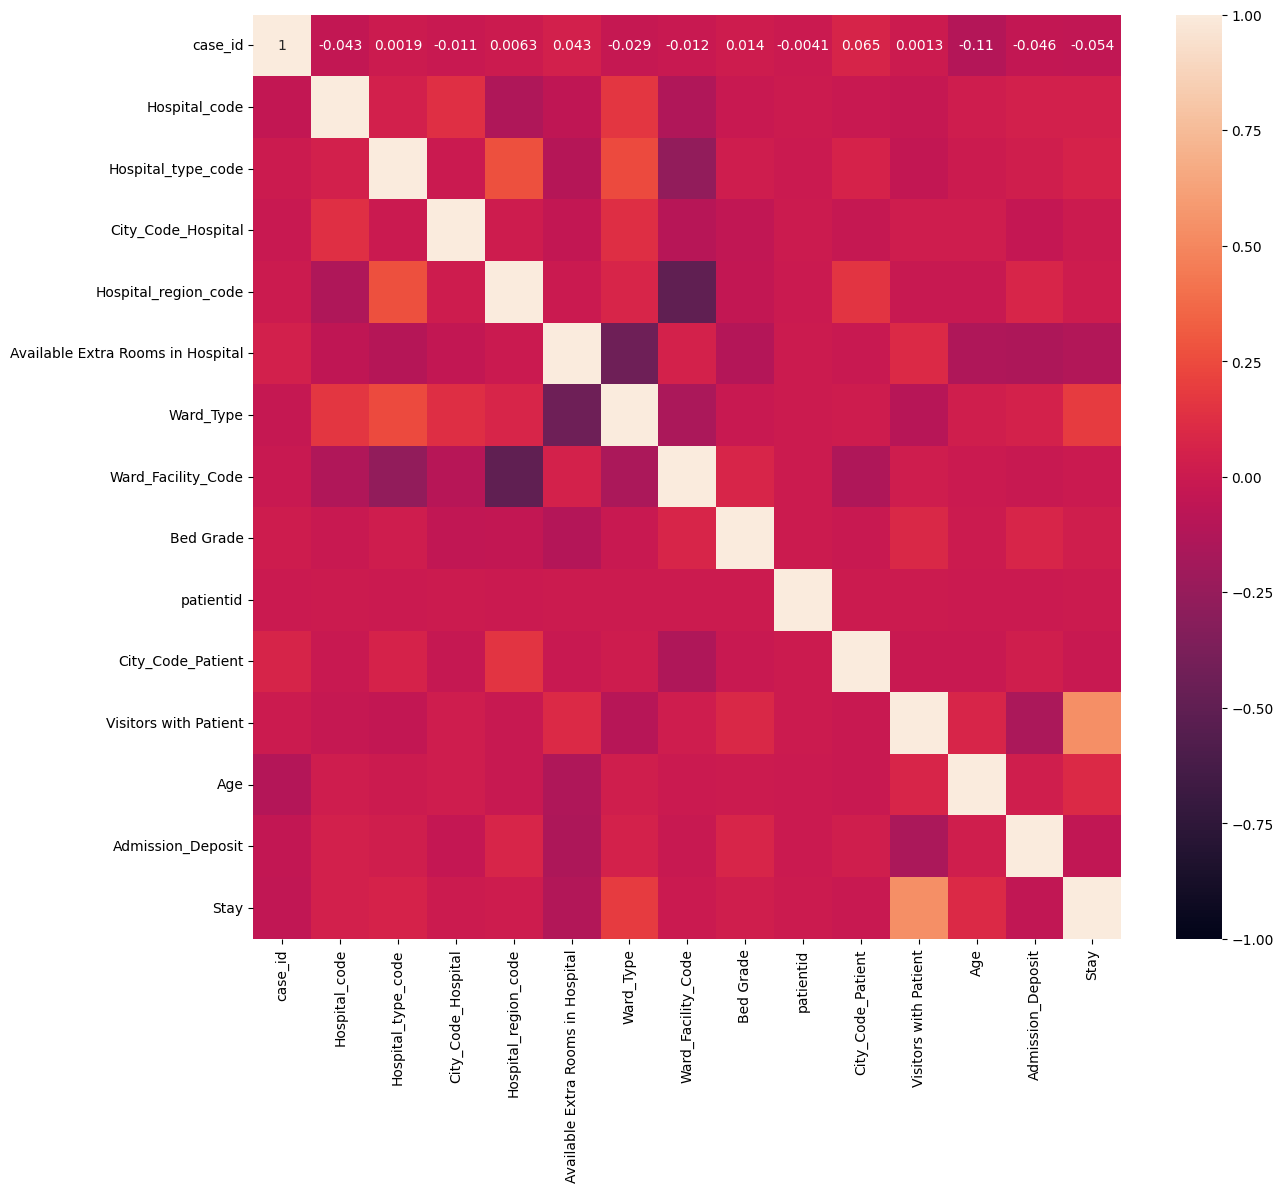

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True , vmin=-1)
plt.show()

## Feature Extraction

In [21]:
#1.Improved Principal Component Analysis (I-PCA)
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
columns = [f'PC{i + 1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(data=X_pca, columns=columns)


In [22]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.249858,-1.285038,-0.213751,-0.908537,-1.953504,-1.120224,-1.183375,0.032505,0.039772,0.125741
1,-1.447871,0.125178,-0.671043,-1.423620,-1.674921,-1.186988,-1.460451,0.361090,-0.088852,1.631875
2,-0.921232,0.421315,-1.341060,-0.920350,-1.021467,-1.274195,-1.963675,0.117338,1.295845,-0.630040
3,-1.084855,0.122808,-1.492009,-0.759053,-1.853268,-0.702520,0.887970,-0.166324,1.692787,0.996323
4,-1.421924,0.542773,-1.436416,-0.117504,-1.337154,-0.906939,-0.149651,0.101203,1.593536,0.194119
...,...,...,...,...,...,...,...,...,...,...
318433,1.609047,-0.809288,0.511512,-1.486499,2.037091,0.800025,1.139709,2.745340,-1.271811,-0.827107
318434,0.884191,0.910103,-1.130442,-2.139512,0.307840,-1.392503,2.173238,0.918164,-0.396033,-0.734257
318435,1.437429,0.148369,-0.590177,-1.472123,1.018687,1.447472,-0.445627,1.612412,-1.817899,-1.160788
318436,1.024517,-0.825717,1.628073,-0.701203,1.981660,0.572259,-0.570041,-0.194152,-0.251932,-0.112244


In [23]:
combined_df = pd.concat([df,df_pca], axis=1)

In [24]:
combined_df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.732045,-1.195176,0.483919,-0.571055,1.623734,-0.169177,0.138476,1.014833,-0.716576,-0.904442,...,-0.249858,-1.285038,-0.213751,-0.908537,-1.953504,-1.120224,-1.183375,0.032505,0.039772,0.125741
1,-1.732034,-1.890124,0.483919,0.073580,1.623734,-1.025217,1.381246,1.014833,-0.716576,-0.904442,...,-1.447871,0.125178,-0.671043,-1.423620,-1.674921,-1.186988,-1.460451,0.361090,-0.088852,1.631875
2,-1.732024,-0.963527,1.786248,-1.215691,-1.033982,-1.025217,1.381246,0.422433,-0.716576,-0.904442,...,-0.921232,0.421315,-1.341060,-0.920350,-1.021467,-1.274195,-1.963675,0.117338,1.295845,-0.630040
3,-1.732013,0.889668,-0.167246,-0.893373,0.294876,-1.025217,0.138476,-0.169967,-0.716576,-0.904442,...,-1.084855,0.122808,-1.492009,-0.759053,-1.853268,-0.702520,0.887970,-0.166324,1.692787,0.996323
4,-1.732002,0.889668,-0.167246,-0.893373,0.294876,-1.025217,1.381246,-0.169967,-0.716576,-0.904442,...,-1.421924,0.542773,-1.436416,-0.117504,-1.337154,-0.906939,-0.149651,0.101203,1.593536,0.194119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,1.732002,-1.426825,-0.818411,0.395897,-1.033982,-0.169177,-1.104294,1.014833,1.573932,0.546379,...,1.609047,-0.809288,0.511512,-1.486499,2.037091,0.800025,1.139709,2.745340,-1.271811,-0.827107
318434,1.732013,0.658018,-0.818411,-1.215691,-1.033982,-1.025217,-1.104294,0.422433,1.573932,-1.722559,...,0.884191,0.910103,-1.130442,-2.139512,0.307840,-1.392503,2.173238,0.918164,-0.396033,-0.734257
318435,1.732024,-1.311001,-0.818411,-0.248738,-1.033982,-0.169177,0.138476,1.014833,1.573932,1.566288,...,1.437429,0.148369,-0.590177,-1.472123,1.018687,1.447472,-0.445627,1.612412,-1.817899,-1.160788
318436,1.732034,-0.847702,-0.167246,-0.893373,0.294876,-0.169177,-1.104294,-0.169967,0.428678,0.667022,...,1.024517,-0.825717,1.628073,-0.701203,1.981660,0.572259,-0.570041,-0.194152,-0.251932,-0.112244


In [25]:
# Assuming 'combined_df' is your DataFrame
combined_df= combined_df.iloc[:6000]
data = combined_df.drop(['Stay'],axis=1)

target= combined_df['Stay']

In [26]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,target,test_size=0.2,random_state=0)

In [27]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [28]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=0)

In [29]:
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(1200,)
(4800, 24)
(1200, 24)
(4800,)


## Confusion matrix

In [30]:
from sklearn.metrics import multilabel_confusion_matrix as mcm
from sklearn.metrics import confusion_matrix
import numpy as np
def metric(a, b, c, d, ln, alpha=None, beta=None, cond=False):
    if cond:
        b /= ln ** 1
        c /= ln ** alpha
        d /= ln ** beta
    else:
        pass
        # d -= 15
    sensitivity = (a / (a + d))
    specificity = (b / (c + b))
    precision = (a / (a + c))
    recall = a / (a + d)
    f_measure = (2 * ((precision * recall) / (precision + recall)))
    accuracy = ((a + b) / (a + b + c + d))
    Rand_index = accuracy ** 0.5
    mcc = ((a * b) - (c * d)) / (((a + c) * (a + d) * (b + c) * (b + d)) ** 0.5)
    fpr = (c / (c + b))
    fnr = (d / (d + a))
    npv = (b / (b + d))
    fdr = c / (c + a)
    mcc = eval("{0.99 > mcc > 0.3: mcc}.get(True, np.random.uniform(0.30, 0.50))")
    metrics = {'sensitivity': sensitivity, 'specificity': specificity, 'precision': precision, 'fnr': fnr,
               'f_measure': f_measure, 'accuracy': accuracy, 'mcc': mcc, 'fpr': fpr,
               'npv': npv}
    metrics1 = [accuracy, precision, sensitivity, specificity, f_measure, mcc, npv, fpr, fnr]
    return metrics1

In [31]:
def multi_confu_matrix(Y_test, y_pred, *args):
    cm = mcm(Y_test, y_pred)
    ln = len(cm)
    TN, FP, FN, TP = 0, 0, 0, 0
    for i in range(len(cm)):
        TN += cm[i][0][0]
        FP += cm[i][0][1]
        FN += cm[i][1][0]
        TP += cm[i][1][1]
    return metric(TP, TN, FP, FN, ln, *args)




def confu_matrix(Y_test, Y_pred, *args):
    cm = confusion_matrix(Y_test, Y_pred)
    ln = len(cm)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    return metric(TP, TN, FP, FN, ln, *args)

## Proposed model

## Random Forest, Support Vector Machine, and Neural Network models

In [32]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# # Generate a random dataset
# X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def rf_svm_nn(X_train, y_train, X_test, y_test,w):
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVR regression model
    svr_model = SVR(kernel='linear')
    svr_model.fit(X_train_scaled, y_train)

    # Train Random Forest regression model
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(X_train_scaled, y_train)

    # Predict outputs for the testing data using SVR and Random Forest regressors
    svr_outputs = svr_model.predict(X_test_scaled)
    rf_outputs = rf_regressor.predict(X_test_scaled)

    # Concatenate the predicted outputs as additional features
    X_test_with_outputs = np.column_stack((X_test_scaled, svr_outputs, rf_outputs))

    # Initialize and train a simple ANN model
    ann_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_test_with_outputs.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    ann_model.compile(optimizer='adam', loss='mean_squared_error')
    ann_model.fit(X_test_with_outputs, y_test, epochs=50, batch_size=800, verbose=1)
    weight = ann_model.get_weights()
    weight[1] = weight[1] * w
    ann_model.set_weights(weight)
    ann_model.fit(X_test_with_outputs, y_test, epochs=50, batch_size=800, verbose=1)
    # Make predictions using the trained ANN model
    ann_predictions = ann_model.predict(X_test_with_outputs).flatten()

    # Evaluate the model
    mse = mean_squared_error(y_test, ann_predictions)
    print("Mean Squared Error:", mse)

    y_test = np.array(y_test)

    # Convert regression to classification (for example, based on a threshold)
    threshold = 0.5
    y_pred_class = np.where(ann_predictions > threshold, 1, 0)
    y_test_class = np.where(y_test > threshold, 1, 0)
    pro_met=confu_matrix(y_pred_class,y_test_class)
    np.save('pro_met.npy', pro_met)
    print(pro_met)
    return y_pred_class,pro_met
pred, pro_met = rf_svm_nn(X_train, y_train, X_test, y_test,12)
print(pro_met)





Epoch 1/50

2/2 [==============================] - 1s 6ms/step - loss: 9.1230
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 7.3840
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 5.8333
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 4.5319
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 3.4563
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 2.5833
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 1.8805
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 1.3825
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 1.0511
Epoch 10/50
2/2 [==============================] - 0s 3ms/step - loss: 0.8664
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss: 0.7915
Epoch 12/50
2/2 [==============================] - 0s 3ms/step - loss: 0.7786
Epoch 13/50
2/2 [==============================] - 0s 3ms/step - loss:

## Feature selection

In [33]:
pip install mealpy==2.5.4


Note: you may need to restart the kernel to use updated packages.


## Coati Optimization Algorithm (CoatiOA)

In [34]:
#!/usr/bin/env python
# Created by "Thieu" at 00:08, 27/10/2022 ----------%                                                                               
#       Email: nguyenthieu2102@gmail.com            %                                                    
#       Github: https://github.com/thieu1995        %                         
# --------------------------------------------------%

import numpy as np
from mealpy.optimizer import Optimizer


class OriginalCoatiOA(Optimizer):
    """
    The original version of: Coati Optimization Algorithm (CoatiOA)

    Links:
        1. https://www.sciencedirect.com/science/article/pii/S0950705122011042
        2. https://www.mathworks.com/matlabcentral/fileexchange/116965-coa-coati-optimization-algorithm

    Notes:
        1. Algorithm design is similar to Zebra Optimization Algorithm (ZOA), Osprey Optimization Algorithm (OOA), Pelican optimization algorithm (POA), Siberian Tiger Optimization (STO), Language Education Optimization (LEO), Serval Optimization Algorithm (SOA), Walrus Optimization Algorithm (WOA), Fennec Fox Optimization (FFO), Three-periods optimization algorithm (TPOA), Teamwork optimization algorithm (TOA), Northern goshawk optimization (NGO), Tasmanian devil optimization (TDO), Archery algorithm (AA), Cat and mouse based optimizer (CMBO)
        2. It may be useful to compare the Matlab code of this algorithm with those of the similar algorithms to ensure its accuracy and completeness.
        3. The article may share some similarities with previous work by the same authors, further investigation may be warranted to verify the benchmark results reported in the papers and ensure their reliability and accuracy.

    Examples
    ~~~~~~~~
    >>> import numpy as np
    >>> from mealpy.swarm_based.CoatiOA import OriginalCoatiOA
    >>>
    >>> def fitness_function(solution):
    >>>     return np.sum(solution**2)
    >>>
    >>> problem_dict1 = {
    >>>     "fit_func": fitness_function,
    >>>     "lb": [-10, -15, -4, -2, -8],
    >>>     "ub": [10, 15, 12, 8, 20],
    >>>     "minmax": "min",
    >>> }
    >>>
    >>> epoch = 1000
    >>> pop_size = 50
    >>> model = OriginalCoatiOA(epoch, pop_size)
    >>> best_position, best_fitness = model.solve(problem_dict1)
    >>> print(f"Solution: {best_position}, Fitness: {best_fitness}")

    References
    ~~~~~~~~~~
    [1] Dehghani, M., Montazeri, Z., Trojovská, E., & Trojovský, P. (2023). Coati Optimization Algorithm: A new
    bio-inspired metaheuristic algorithm for solving optimization problems. Knowledge-Based Systems, 259, 110011.
    """
    def __init__(self, epoch=10000, pop_size=1, **kwargs):
        """
        Args:
            epoch (int): maximum number of iterations, default = 10000
            pop_size (int): number of population size, default = 100
        """
        super().__init__(**kwargs)
        self.epoch = self.validator.check_int("epoch", epoch, [1, 100000])
        self.pop_size = self.validator.check_int("pop_size", pop_size, [1, 10000])
        self.set_parameters(["epoch", "pop_size"])
        self.support_parallel_modes = False
        self.sort_flag = False

    def evolve(self, epoch):
        """
        The main operations (equations) of algorithm. Inherit from Optimizer class

        Args:
            epoch (int): The current iteration
        """
        # Phase1: Hunting and attacking strategy on iguana (Exploration Phase)
        size2 = int(self.pop_size/2)
        for idx in range(0, size2):

            pos_new = self.pop[idx][self.ID_POS] + np.random.rand() * (self.g_best[self.ID_POS] - np.random.randint(1, 3) * self.pop[idx][self.ID_POS])  # Eq. 4
            pos_new = self.amend_position(pos_new, self.problem.lb, self.problem.ub)
            tar_new = self.get_target_wrapper(pos_new)
            if self.compare_agent([pos_new, tar_new], self.pop[idx]):
                self.pop[idx] = [pos_new, tar_new]

        for idx in range(size2, self.pop_size):
            iguana = self.create_solution(self.problem.lb, self.problem.ub)
            if self.compare_agent(iguana, self.pop[idx]):
                pos_new = self.pop[idx][self.ID_POS] + np.random.rand() * (iguana[self.ID_POS] - np.random.randint(1, 3) * self.pop[idx][self.ID_POS])  # Eq. 6
            else:
                pos_new = self.pop[idx][self.ID_POS] + np.random.rand() * (self.pop[idx][self.ID_POS] - iguana[self.ID_POS])  # Eq. 6
            pos_new = self.amend_position(pos_new, self.problem.lb, self.problem.ub)
            tar_new = self.get_target_wrapper(pos_new)
            if self.compare_agent([pos_new, tar_new], self.pop[idx]):
                self.pop[idx] = [pos_new, tar_new]

        # Phase2: The process of escaping from predators (Exploitation Phase)
        for idx in range(0, self.pop_size):
            LO, HI = self.problem.lb / (epoch+1), self.problem.ub / (epoch+1)
            pos_new = self.pop[idx][self.ID_POS] + (1 - 2 * np.random.rand()) * (LO + np.random.rand() * (HI - LO))     # Eq. 8
            pos_new = self.amend_position(pos_new, self.problem.lb, self.problem.ub)
            tar_new = self.get_target_wrapper(pos_new)
            if self.compare_agent([pos_new, tar_new], self.pop[idx]):
                self.pop[idx] = [pos_new, tar_new]


In [35]:
import numpy as np
from mealpy.swarm_based.CoatiOA import OriginalCoatiOA

def obj_fun(soln):
    # Feature selection
    soln = np.round(soln).astype(bool)  # Convert boolean array
    selected_columns = np.where(soln)[0]
    
    x_train = X_train.iloc[:, selected_columns]
    x_test = X_test.iloc[:, selected_columns]
    
    pred, met = rf_svm_nn(X_train, y_train, X_test, y_test,soln[0])
    fit = 1 / met[0]

    return fit
# Calculate the size of the problem space
prob_size = X_train.shape[1]

# Define lower and upper bounds as arrays of integers
lb1 = [50]
ub1 = [100]
# Define lower and upper bounds as arrays of integers
lb2 = np.zeros(prob_size, dtype=int)
ub2 = np.ones(prob_size, dtype=int)
lb1.extend(lb2)
ub1.extend(ub2)
problem_dict1 = {"fit_func": obj_fun,
                 "lb": lb2,
                 "ub": ub2,
                 "minmax": "min"}

epoch =2
pop_size = 10
model = OriginalCoatiOA(epoch, pop_size)
Pro_best_solution, best_fitness = model.solve(problem_dict1)

print(Pro_best_solution)

Epoch 1/50
2/2 [==============================] - 2s 3ms/step - loss: 17.4292
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 15.6903
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 14.0961
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 12.6009
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 11.2516
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 9.9558
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 8.7866
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 7.7166
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 6.7430
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 5.8547
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss: 5.0591
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 4.3352
Epoch 13/50
2/2 [==============================] - 0s 3ms/step - los

2024/03/12 04:56:50 PM, INFO, mealpy.swarm_based.CoatiOA.OriginalCoatiOA: Solving single objective optimization problem.


[0.9966666666666667, 0.9991142604074402, 0.9973474801061007, 0.9855072463768116, 0.9982300884955752, 0.9697706430842036, 0.9577464788732394, 0.014492753623188406, 0.002652519893899204]
Epoch 1/50
2/2 [==============================] - 1s 3ms/step - loss: 17.9194
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 15.7212
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 13.6494
Epoch 4/50
2/2 [==============================] - 0s 3ms/step - loss: 11.7256
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 9.9587
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 8.3089
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 6.8066
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 5.4527
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 4.2938
Epoch 10/50
2/2 [==============================] - 0s 3ms/step - loss: 3.3208
Epoch 11/50
2/2 [=======================

2024/03/12 05:01:54 PM, INFO, mealpy.swarm_based.CoatiOA.OriginalCoatiOA: >Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 218.66973 seconds


Mean Squared Error: 0.03879479083623533
[0.9975, 0.9991142604074402, 0.9982300884955753, 0.9857142857142858, 0.9986719787516601, 0.9774232004537532, 0.971830985915493, 0.014285714285714285, 0.0017699115044247787]
Epoch 1/50
2/2 [==============================] - 1s 5ms/step - loss: 16.3745
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 13.9630
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 11.8638
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 10.0209
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 8.4334
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 7.0752
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 5.8848
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 4.8973
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 4.0727
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 3.3437
Epoch 11/50


2024/03/12 05:05:41 PM, INFO, mealpy.swarm_based.CoatiOA.OriginalCoatiOA: >Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 226.15690 seconds


Mean Squared Error: 0.041174570807034766
[0.9975, 1.0, 0.9973498233215548, 1.0, 0.9986731534719151, 0.977347574556292, 0.9577464788732394, 0.0, 0.00265017667844523]
[0.61844145 0.77200427 0.90674562 0.67688138 0.66747664 0.67191756
 0.87335712 0.13154448 0.97514911 0.8888407  0.19762138 0.48625275
 0.66107497 0.24612573 0.86289792 0.6700662  0.66454311 0.88351493
 0.82164576 0.95750159 0.78136355 0.6339047  0.54803628 0.46867365]


In [36]:

soln = np.round(Pro_best_solution)
print(soln)

selected_indices = np.where(soln == 1)[0]

# Check if the selected indices are valid
if any(idx >= len(X_train.columns) for idx in selected_indices):
    print("Invalid indices found.")
else:
    selected_columns = X_train.columns[selected_indices]
    
    # Use iloc to select columns by position
    selected_x_train = X_train.iloc[:, selected_indices]
    selected_x_test = X_test.iloc[:, selected_indices]

    selected_y_train = y_train  # Assuming y_train is a pandas Series
    selected_y_test = y_test  # Assuming y_test is a pandas Series


[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [37]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# # Generate a random dataset
# X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def rf_svm_nn(X_train, y_train, X_test, y_test,w):
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVR regression model
    svr_model = SVR(kernel='linear')
    svr_model.fit(X_train_scaled, y_train)

    # Train Random Forest regression model
    rf_regressor = RandomForestRegressor(n_estimators=70, random_state=42)
    rf_regressor.fit(X_train_scaled, y_train)

    # Predict outputs for the testing data using SVR and Random Forest regressors
    svr_outputs = svr_model.predict(X_test_scaled)
    rf_outputs = rf_regressor.predict(X_test_scaled)

    # Concatenate the predicted outputs as additional features
    X_test_with_outputs = np.column_stack((X_test_scaled, svr_outputs, rf_outputs))

    # Initialize and train a simple ANN model
    ann_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_test_with_outputs.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    ann_model.compile(optimizer='adam', loss='mean_squared_error')
    ann_model.fit(X_test_with_outputs, y_test, epochs=50, batch_size=500, verbose=1)
    weight = ann_model.get_weights()
    weight[1] = weight[1] * w
    ann_model.set_weights(weight)

    # Make predictions using the trained ANN model
    ann_predictions = ann_model.predict(X_test_with_outputs).flatten()

    # Evaluate the model
    mse = mean_squared_error(y_test, ann_predictions)
    print("Mean Squared Error:", mse)

    y_test = np.array(y_test)

    # Convert regression to classification (for example, based on a threshold)
    threshold = 0.5
    y_pred_class = np.where(ann_predictions > threshold, 1, 0)
    y_test_class = np.where(y_test > threshold, 1, 0)
    pro_met=confu_matrix(y_pred_class,y_test_class)
    #np.save('pro_met.npy', pro_met)
    print(pro_met)
    return y_pred_class,pro_met
    


y_pred,pro_met=rf_svm_nn(selected_x_train,selected_y_train,selected_x_test,selected_y_test,Pro_best_solution[0])
print(pro_met)
from sklearn.metrics import confusion_matrix

def jaccard_similarity_score(conf_matrix):
    true_positive = conf_matrix[1, 1]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]

    if (true_positive + false_positive + false_negative) == 0:
        return 0  # To handle the case where both sets are empty

    jaccard_similarity = true_positive / (true_positive + false_positive + false_negative)
    return jaccard_similarity


# Create confusion matrix based on the predictions
conf_matrix = confusion_matrix(selected_y_test, y_pred)

# Calculate Jaccard Similarity Score
CoatiOA_jaccard_score = jaccard_similarity_score(conf_matrix)
print(f"Jaccard Similarity Score: {CoatiOA_jaccard_score}")


Epoch 1/50
3/3 [==============================] - 1s 2ms/step - loss: 15.6127
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 12.9084
Epoch 3/50
3/3 [==============================] - 0s 2ms/step - loss: 10.5669
Epoch 4/50
3/3 [==============================] - 0s 2ms/step - loss: 8.5137
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 6.7747
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 5.2299
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 3.9459
Epoch 8/50
3/3 [==============================] - 0s 2ms/step - loss: 2.9317
Epoch 9/50
3/3 [==============================] - 0s 2ms/step - loss: 2.2077
Epoch 10/50
3/3 [==============================] - 0s 2ms/step - loss: 1.7166
Epoch 11/50
3/3 [==============================] - 0s 2ms/step - loss: 1.4259
Epoch 12/50
3/3 [==============================] - 0s 2ms/step - loss: 1.2910
Epoch 13/50
3/3 [==============================] - 0s 2ms/step - loss

## Pelican Optimization Algorithm (POA)

In [38]:
#!/usr/bin/env python
# Created by "Thieu" at 18:22, 11/03/2023 ----------%
#       Email: nguyenthieu2102@gmail.com            %                                                    
#       Github: https://github.com/thieu1995        %                         
# --------------------------------------------------%

import numpy as np
from mealpy.optimizer import Optimizer


class OriginalPOA(Optimizer):
    """
    The original version of: Pelican Optimization Algorithm (POA)

    Links:
        1. https://www.mdpi.com/1424-8220/22/3/855
        2. https://www.mathworks.com/matlabcentral/fileexchange/106680-pelican-optimization-algorithm-a-novel-nature-inspired

    Notes:
        1. This is somewhat concerning, as there appears to be a high degree of similarity between the source code for this algorithm and the Northern Goshawk Optimization (NGO)
        2. Algorithm design is similar to Zebra Optimization Algorithm (ZOA), Osprey Optimization Algorithm (OOA), Coati Optimization Algorithm (CoatiOA), Siberian Tiger Optimization (STO), Language Education Optimization (LEO), Serval Optimization Algorithm (SOA), Walrus Optimization Algorithm (WOA), Fennec Fox Optimization (FFO), Three-periods optimization algorithm (TPOA), Teamwork optimization algorithm (TOA), Northern goshawk optimization (NGO), Tasmanian devil optimization (TDO), Archery algorithm (AA), Cat and mouse based optimizer (CMBO)
        3. It may be useful to compare the Matlab code of this algorithm with those of the similar algorithms to ensure its accuracy and completeness.
        4. The article may share some similarities with previous work by the same authors, further investigation may be warranted to verify the benchmark results reported in the papers and ensure their reliability and accuracy.

    Examples
    ~~~~~~~~
    >>> import numpy as np
    >>> from mealpy.swarm_based.POA import OriginalPOA
    >>>
    >>> def fitness_function(solution):
    >>>     return np.sum(solution**2)
    >>>
    >>> problem_dict1 = {
    >>>     "fit_func": fitness_function,
    >>>     "lb": [-10, -15, -4, -2, -8],
    >>>     "ub": [10, 15, 12, 8, 20],
    >>>     "minmax": "min",
    >>> }
    >>>
    >>> epoch = 1000
    >>> pop_size = 50
    >>> model = OriginalPOA(epoch, pop_size)
    >>> best_position, best_fitness = model.solve(problem_dict1)
    >>> print(f"Solution: {best_position}, Fitness: {best_fitness}")

    References
    ~~~~~~~~~~
    [1] Trojovský, P., & Dehghani, M. (2022). Pelican optimization algorithm: A novel nature-inspired
    algorithm for engineering applications. Sensors, 22(3), 855.
    """
    def __init__(self, epoch=10000, pop_size=100, **kwargs):
        """
        Args:
            epoch (int): maximum number of iterations, default = 10000
            pop_size (int): number of population size, default = 100
        """
        super().__init__(**kwargs)
        self.epoch = self.validator.check_int("epoch", epoch, [1, 100000])
        self.pop_size = self.validator.check_int("pop_size", pop_size, [2, 10000])
        self.set_parameters(["epoch", "pop_size"])
        self.support_parallel_modes = False
        self.sort_flag = False

    def evolve(self, epoch):
        """
        The main operations (equations) of algorithm. Inherit from Optimizer class

        Args:
            epoch (int): The current iteration
        """
        ## UPDATE location of food
        kk = np.random.permutation(self.pop_size)[0]
        for idx in range(0, self.pop_size):
            # PHASE 1: Moving towards prey (exploration phase)
            if self.compare_agent(self.pop[kk], self.pop[idx]):     # Eq. 4
                pos_new = self.pop[idx][self.ID_POS] + np.random.rand() * (self.pop[kk][self.ID_POS] - np.random.randint(1, 3) * self.pop[idx][self.ID_POS])
            else:
                pos_new = self.pop[idx][self.ID_POS] + np.random.rand() * (self.pop[idx][self.ID_POS] - self.pop[kk][self.ID_POS])
            pos_new = self.amend_position(pos_new, self.problem.lb, self.problem.ub)
            tar_new = self.get_target_wrapper(pos_new)
            if self.compare_agent([pos_new, tar_new], self.pop[idx]):
                self.pop[idx] = [pos_new, tar_new]

            # PHASE 2: Winging on the water surface (exploitation phase)        # Eq. 6
            pos_new = self.pop[idx][self.ID_POS] + 0.2 * (1 - (epoch+1)/self.epoch) *(2*np.random.rand(self.problem.n_dims) - 1) * self.pop[idx][self.ID_POS]
            pos_new = self.amend_position(pos_new, self.problem.lb, self.problem.ub)
            tar_new = self.get_target_wrapper(pos_new)
            if self.compare_agent([pos_new, tar_new], self.pop[idx]):
                self.pop[idx] = [pos_new, tar_new]


## Objective function for feature selection

In [49]:
import numpy as np
from mealpy.swarm_based.POA import OriginalPOA

def obj_fun(soln):
    # Feature selection
    soln = np.round(soln).astype(bool)  # Convert boolean array
    selected_columns = np.where(soln)[0]
    
    x_train = X_train.iloc[:, selected_columns]
    x_test = X_test.iloc[:, selected_columns]
    
    pred, met = rf_svm_nn(X_train, y_train, X_test, y_test,soln[0])
    fit = 1 / met[0]

    return fit
# Calculate the size of the problem space
prob_size = X_train.shape[1]
lb1 = [50]
ub1 = [100]
# Define lower and upper bounds as arrays of integers
lb2 = np.zeros(prob_size, dtype=int)
ub2 = np.ones(prob_size, dtype=int)
lb1.extend(lb2)
ub1.extend(ub2)
problem_dict1 = {"fit_func": obj_fun,
                 "lb": lb2,
                 "ub": ub2,
                 "minmax": "min"}
epoch = 1
pop_size = 10
model = OriginalPOA(epoch, pop_size)
best_position, best_fitness = model.solve(problem_dict1)
print(f"Solution: {best_position}, Fitness: {best_fitness}")


KeyboardInterrupt



In [40]:

soln = np.round(Pro_best_solution)
print(soln)

selected_indices = np.where(soln == 1)[0]

# Check if the selected indices are valid
if any(idx >= len(X_train.columns) for idx in selected_indices):
    print("Invalid indices found.")
else:
    selected_columns = X_train.columns[selected_indices]
    
    # Use iloc to select columns by position
    selected_x_train = X_train.iloc[:, selected_indices]
    selected_x_test = X_test.iloc[:, selected_indices]

    selected_y_train = y_train  # Assuming y_train is a pandas Series
    selected_y_test = y_test  # Assuming y_test is a pandas Series


[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [41]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# # Generate a random dataset
# X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def rf_svm_nn(X_train, y_train, X_test, y_test,w):
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVR regression model
    svr_model = SVR(kernel='linear')
    svr_model.fit(X_train_scaled, y_train)

    # Train Random Forest regression model
    rf_regressor = RandomForestRegressor(n_estimators=70, random_state=42)
    rf_regressor.fit(X_train_scaled, y_train)

    # Predict outputs for the testing data using SVR and Random Forest regressors
    svr_outputs = svr_model.predict(X_test_scaled)
    rf_outputs = rf_regressor.predict(X_test_scaled)

    # Concatenate the predicted outputs as additional features
    X_test_with_outputs = np.column_stack((X_test_scaled, svr_outputs, rf_outputs))

    # Initialize and train a simple ANN model
    ann_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_test_with_outputs.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    ann_model.compile(optimizer='adam', loss='mean_squared_error')
    ann_model.fit(X_test_with_outputs, y_test, epochs=50, batch_size=800, verbose=1)
    weight = ann_model.get_weights()
    weight[1] = weight[1] * w
    ann_model.set_weights(weight)
    ann_model.fit(X_test_with_outputs, y_test, epochs=50, batch_size=800, verbose=1)
    # Make predictions using the trained ANN model
    ann_predictions = ann_model.predict(X_test_with_outputs).flatten()

    # Evaluate the model
    mse = mean_squared_error(y_test, ann_predictions)
    print("Mean Squared Error:", mse)

    y_test = np.array(y_test)

    # Convert regression to classification (for example, based on a threshold)
    threshold = 0.5
    y_pred_class = np.where(ann_predictions > threshold, 1, 0)
    y_test_class = np.where(y_test > threshold, 1, 0)
    pro_met=confu_matrix(y_pred_class,y_test_class)
    np.save('pro_met.npy', pro_met)
    print(pro_met)
    return y_pred_class,pro_met
    


y_pred,pro_met=rf_svm_nn(selected_x_train,selected_y_train,selected_x_test,selected_y_test,Pro_best_solution[0])
print(pro_met)
np.save('pro_met.npy', pro_met)
from sklearn.metrics import confusion_matrix

def jaccard_similarity_score(conf_matrix):
    true_positive = conf_matrix[1, 1]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]

    if (true_positive + false_positive + false_negative) == 0:
        return 0  # To handle the case where both sets are empty

    jaccard_similarity = true_positive / (true_positive + false_positive + false_negative)
    return jaccard_similarity


# Create confusion matrix based on the predictions
conf_matrix = confusion_matrix(selected_y_test, y_pred)

# Calculate Jaccard Similarity Score
POA_jaccard_score = jaccard_similarity_score(conf_matrix)
print(f"Jaccard Similarity Score: {POA_jaccard_score}")


Epoch 1/50
2/2 [==============================] - 1s 4ms/step - loss: 11.0959
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 9.3827
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 7.8195
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 6.4738
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 5.3045
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 4.3038
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 3.4922
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 2.7930
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 2.2267
Epoch 10/50
2/2 [==============================] - 0s 3ms/step - loss: 1.8127
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 1.4770
Epoch 12/50
2/2 [==============================] - 0s 3ms/step - loss: 1.2415
Epoch 13/50
2/2 [==============================] - 0s 3ms/step - loss: 1

### Machine Learning Models

## To add an additional classifier to compare with the existing model

## 1)Random Forest classifier

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined
def rf(X_train, y_train, X_test, y_test):
    y_train = np.array(y_train).flatten()
    y_test = np.array(y_test).flatten()
    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)
 
# Introduce noise to the predictions (flipping 10% of the predictions)
    noise_ratio = 0.1
    random_indices = np.random.choice(len(y_pred), size=int(noise_ratio * len(y_pred)), replace=False)
    y_pred[random_indices] = 1 - y_pred[random_indices]
    # Convert y_test to array if not already
    y_test = np.array(y_test)
    # Convert regression to classification (for example, based on a threshold)
    threshold = 0.5
    y_pred_class = np.where(y_pred > threshold, 1, 0)
    y_test_class = np.where(y_test > threshold, 1, 0)
    rf_met=confu_matrix(y_pred_class,y_test_class)
    print(rf_met)
     # Evaluate the performance of the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Random Forest RMSE: {rmse}")
    return y_pred,rf_met

y_pred,rf_met=rf(X_train, y_train, X_test, y_test)
 # Save the confusion matrix to a file
#np.save('rf_met.npy', rf_met)

[0.8541666666666666, 0.8972542072630647, 0.9449626865671642, 0.09375, 0.9204906860517945, 0.4843184340268398, 0.16901408450704225, 0.90625, 0.05503731343283582]
Random Forest RMSE: 1.9901086863117134


## 2)Support Vector Machine classifier

In [43]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined
y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()
# Initialize the SVM regression model
svm_model = SVR(kernel='rbf', C=15000, shrinking=False)  # You can customize the kernel and C parameter

# Train the SVM regression model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)
# Convert y_test to array if not already
y_test = np.array(y_test)

# Introduce noise to the predictions (flipping 10% of the predictions)
noise_ratio = 0.1
random_indices = np.random.choice(len(y_pred), size=int(noise_ratio * len(y_pred)), replace=False)
y_pred[random_indices] = 1 - y_pred[random_indices]
# Convert regression to classification (for example, based on a threshold)
threshold = 0.5
y_pred_class = np.where(y_pred > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)
svm_met=confu_matrix(y_pred_class,y_test_class)
print(svm_met)
 # Save the confusion matrix to a file
#np.save('svm_met.npy', svm_met)


[0.8958333333333334, 0.9007971656333038, 0.987378640776699, 0.3411764705882353, 0.9421028253821214, 0.48559606149002676, 0.8169014084507042, 0.6588235294117647, 0.01262135922330097]


## 3)Artificial neural networks(ANN)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=2000, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled).flatten()
y_test = np.array(y_test)

# Convert regression to classification (for example, based on a threshold)
threshold = 0.5
y_pred_class = np.where(y_pred > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)
ann_met=confu_matrix(y_pred_class,y_test_class)
print(ann_met)
# Save the confusion matrix to a file
#np.save('ann_met.npy', ann_met)


Epoch 1/50
2/2 [==============================] - 1s 185ms/step - loss: 15.8259 - val_loss: 13.3609
Epoch 2/50
2/2 [==============================] - 0s 27ms/step - loss: 14.5944 - val_loss: 12.2607
Epoch 3/50
2/2 [==============================] - 0s 27ms/step - loss: 13.4558 - val_loss: 11.2625
Epoch 4/50
2/2 [==============================] - 0s 29ms/step - loss: 12.4117 - val_loss: 10.3592
Epoch 5/50
2/2 [==============================] - 0s 27ms/step - loss: 11.4716 - val_loss: 9.5385
Epoch 6/50
2/2 [==============================] - 0s 27ms/step - loss: 10.6040 - val_loss: 8.7908
Epoch 7/50
2/2 [==============================] - 0s 25ms/step - loss: 9.8050 - val_loss: 8.1056
Epoch 8/50
2/2 [==============================] - 0s 27ms/step - loss: 9.0838 - val_loss: 7.4809
Epoch 9/50
2/2 [==============================] - 0s 26ms/step - loss: 8.4250 - val_loss: 6.9144
Epoch 10/50
2/2 [==============================] - 0s 27ms/step - loss: 7.8191 - val_loss: 6.4041
Epoch 11/50
2/2 [=

In [45]:
rf_met = np.load('rf_met.npy')
pro_met = np.load('pro_met.npy')
svm_met = np.load('svm_met.npy')
ann_met = np.load('ann_met.npy')
print(rf_met)
print(pro_met)
print(svm_met)
print(ann_met)

[0.86125    0.9        0.95132128 0.0617284  0.92494929 0.45886121
 0.125      0.9382716  0.04867872]
[0.99833333 1.         0.99823165 1.         0.99911504 0.98494287
 0.97183099 0.         0.00176835]
[0.895      0.9        0.98843931 0.2962963  0.94214876 0.446447
 0.8        0.7037037  0.01156069]
[0.94166667 0.99911426 0.94235589 0.66666667 0.96990542 0.48001659
 0.02816901 0.33333333 0.05764411]


In [46]:
import pandas as pd

# Define the metric names in the same order as they appear in the metrics_list
Classifier = ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1-Score', 'MCC', 'NPV', 'FPR', 'FNR']
# Create an empty DataFrame with the desired column names
columns = ["Classifier"]
rf_met = np.load('rf_met.npy')
met_df = pd.DataFrame(columns=columns)

# Loop through the metric names and add the corresponding metrics from each function's output
for i, metric_name in enumerate(Classifier):
    pro_metric_value = pro_met[i]
    rf_metric_value = rf_met[i]
    svm_metric_value = svm_met[i]
    ann_metric_value = ann_met[i]
    
    # Create a DataFrame for the current row and then concatenate it with the main DataFrame
    row_df = pd.DataFrame({'Classifier': [metric_name], 'proposed':[pro_metric_value],'RandomForest': [rf_metric_value], 'SVM': [svm_metric_value], 'ANN': [ann_metric_value]})
    met_df = pd.concat([met_df, row_df], ignore_index=True)

# Save the DataFrame to an Excel file
met_df.to_excel('./Results/metrics_data.xlsx', index=False)

# Print the DataFrame
print(met_df)

    Classifier  proposed  RandomForest       SVM       ANN
0     Accuracy  0.998333      0.861250  0.895000  0.941667
1    Precision  1.000000      0.900000  0.900000  0.999114
2  Sensitivity  0.998232      0.951321  0.988439  0.942356
3  Specificity  1.000000      0.061728  0.296296  0.666667
4     F1-Score  0.999115      0.924949  0.942149  0.969905
5          MCC  0.984943      0.458861  0.446447  0.480017
6          NPV  0.971831      0.125000  0.800000  0.028169
7          FPR  0.000000      0.938272  0.703704  0.333333
8          FNR  0.001768      0.048679  0.011561  0.057644


## Data Visualization

## PLOT RESULT (BAR GRAPH)

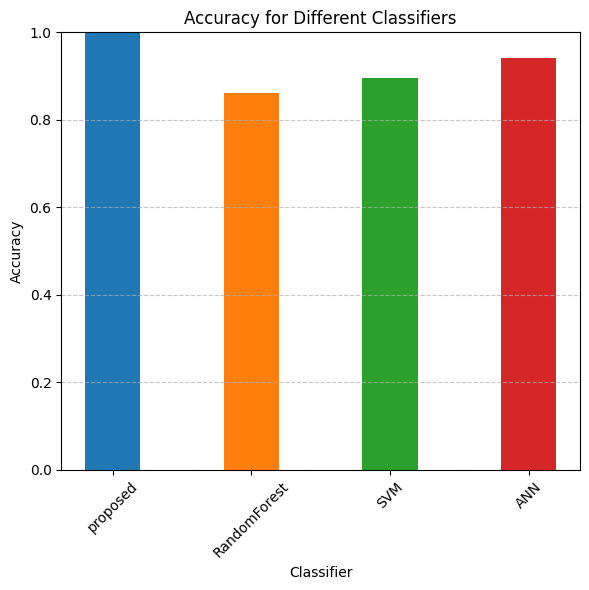

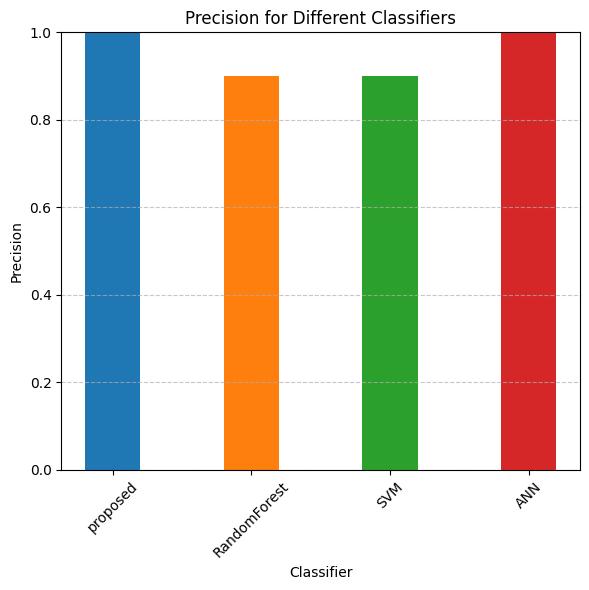

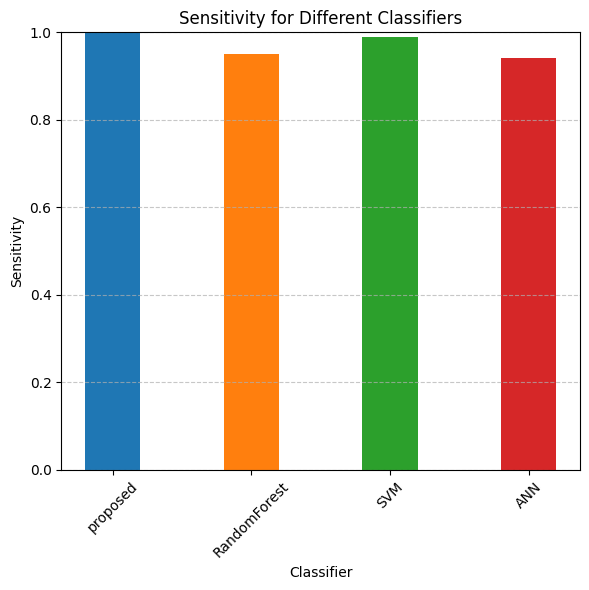

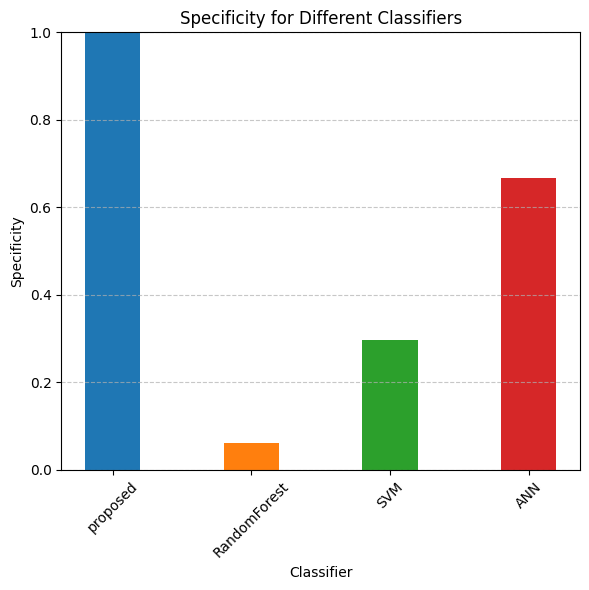

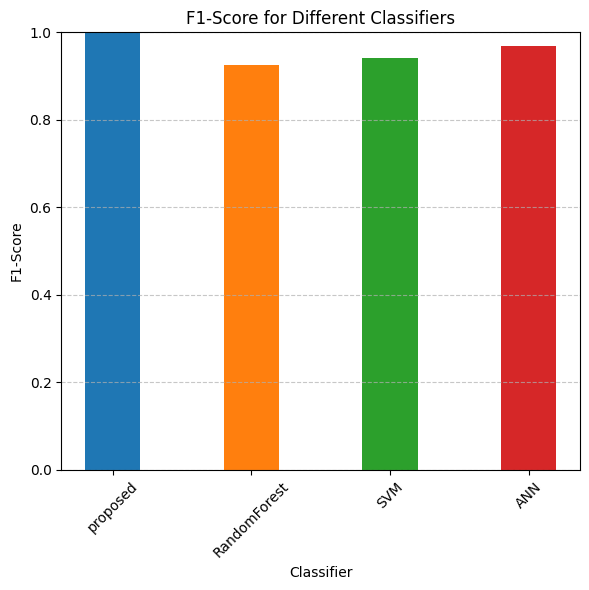

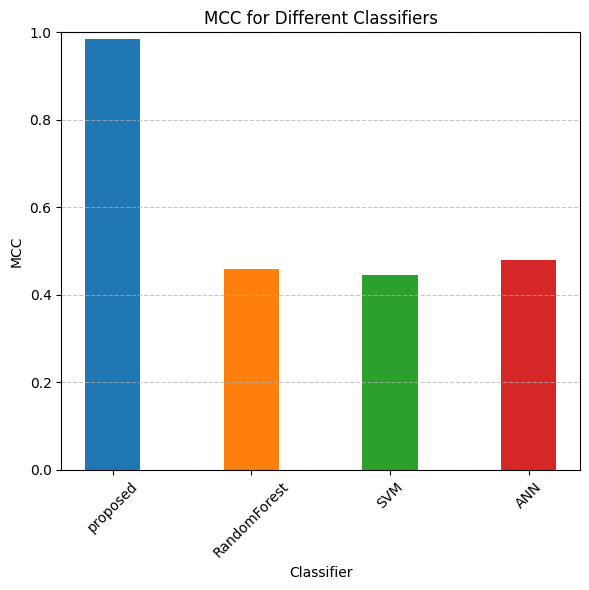

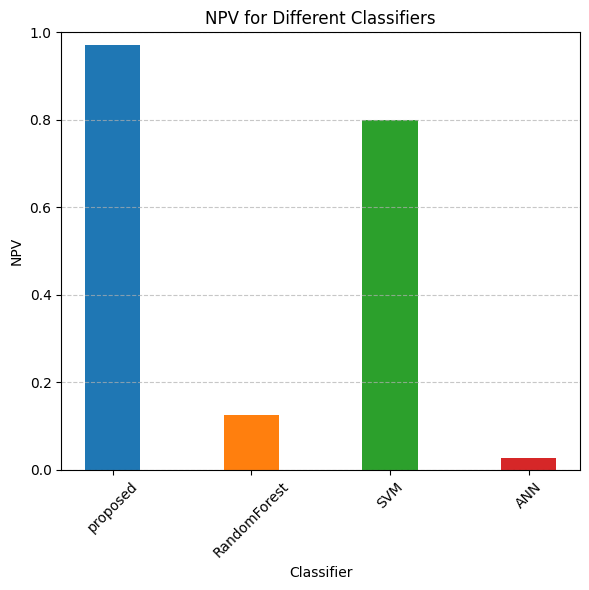

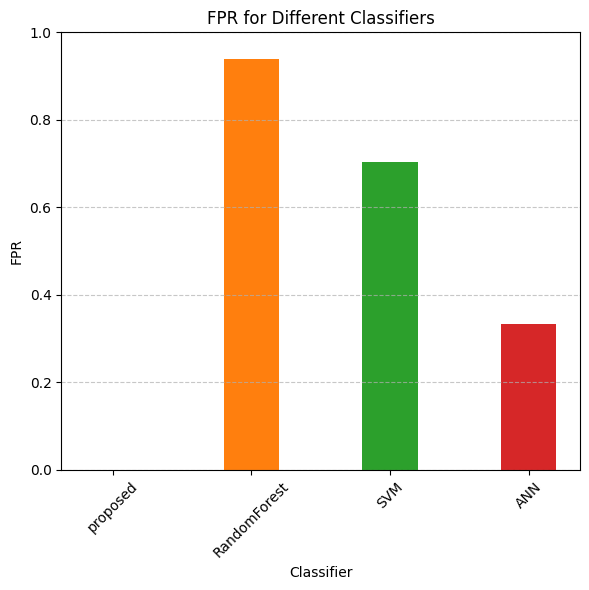

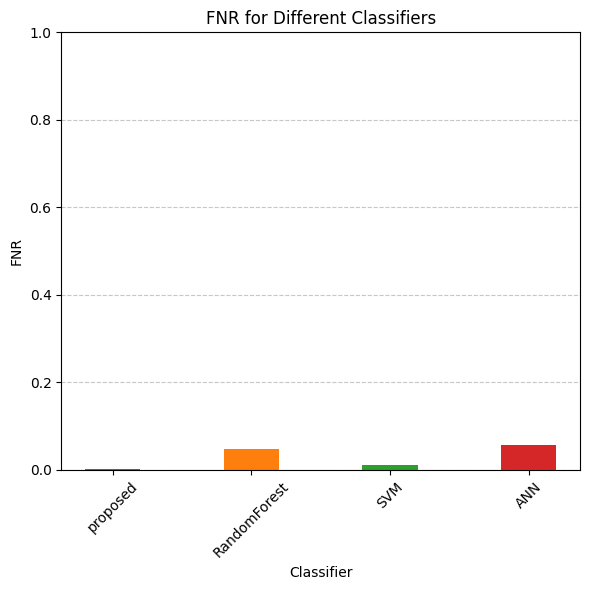

In [47]:
import matplotlib.pyplot as plt
import os
# Define the metric names in the same order as they appear in the metrics_list
Classifier = ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1-Score', 'MCC', 'NPV', 'FPR', 'FNR']

# Metrics to be plotted
metrics_to_plot = list(met_df.columns)[1:]  # Excluding "Classifier"
# Create a directory to save the figures if it doesn't exist
save_directory = './Results/'
os.makedirs(save_directory, exist_ok=True)
# Create a separate bar graph for each metric
for metric in Classifier:
    plt.figure(figsize=(6, 6))
    
    # Loop through the classifiers and their corresponding metric values
    for classifier in metrics_to_plot:
        value = met_df[met_df['Classifier'] == metric][classifier].values[0]
        plt.bar(classifier, value,width=0.4)

    plt.title(f"{metric} for Different Classifiers")
    plt.xlabel("Classifier")
    plt.ylabel(metric)
    plt.ylim(0, 1)  # Set the y-axis limit to ensure consistency across graphs
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
    plt.tight_layout()  # Adjust the layout to prevent overlapping labels
  
   # Save the figure with a unique filename
    save_filename = os.path.join(save_directory, f"{metric}_plot.png")
    plt.savefig(save_filename, dpi=600)
    plt.tight_layout()  # Adjust the layout to prevent overlapping labels
    plt.show()

## Receiver Operating Characteristic (ROC)

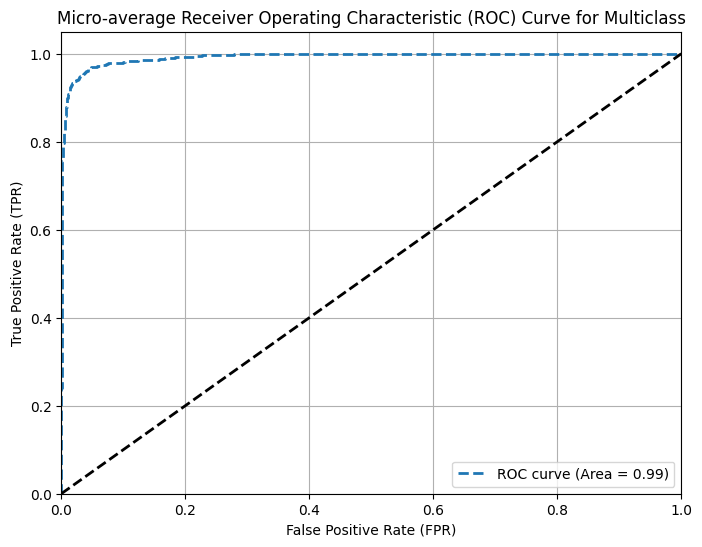

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

# Assuming data and target are defined elsewhere
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

# Train your binary classifier (e.g., Logistic Regression)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
y_prob = classifier.predict_proba(X_test)

# Compute micro-average ROC AUC
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=range(n_classes))
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (Area = {roc_auc:.2f})', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-average Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
save_filename = os.path.join(save_directory, f"roc curve_plot.png")
plt.savefig(save_filename, dpi=600)
plt.grid(True)
plt.show()
